In [ ]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/MyDrive/Kaggle"

In [ ]:
%cd /content/gdrive/MyDrive/Kaggle

/content/gdrive/MyDrive/Kaggle


In [ ]:
! kaggle datasets download -d cpluzshrijayan/milkquality

  0% 0.00/1.24k [00:00<?, ?B/s]
100% 1.24k/1.24k [00:00<00:00, 255kB/s]


In [ ]:
! unzip \*.zip && rm *.zip

Archive:  milkquality.zip
  inflating: milknew.csv             


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
# load the dataset
milk = pd.read_csv('milknew.csv')
milk

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium
...,...,...,...,...,...,...,...,...
1054,6.7,45,1,1,0,0,247,medium
1055,6.7,38,1,0,1,0,255,high
1056,3.0,40,1,1,1,1,255,low
1057,6.8,43,1,0,1,0,250,high


Berdasarkan Informasi di atas didapat:

*   Ada 1059 baris atau records dalam dataset.
*   Terdapat 8 kolom yaitu: pH, Temprature, Taste, Odor, Fat, Turbidity, Colour, Grade.



In [ ]:
# Ganti nama kolom Temprature menjadi Temperature agak mudah dipahami
milk.rename(columns={'Temprature': 'Temperature'}, inplace=True)

In [ ]:
milk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pH           1059 non-null   float64
 1   Temperature  1059 non-null   int64  
 2   Taste        1059 non-null   int64  
 3   Odor         1059 non-null   int64  
 4   Fat          1059 non-null   int64  
 5   Turbidity    1059 non-null   int64  
 6   Colour       1059 non-null   int64  
 7   Grade        1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


Dari output terlihat bahwa:

*   Terdapat 1 kolom numerik dengan tipe float64 yaitu: pH.
*   Terdapat 6 kolom numerik dengan tipe data int64, yaitu: Temprature, Taste, Odor, Fat, Turbidity, Colour.
*   Terdapat 1 kolom dengan tipe object, yaitu: Grade. Kolom ini merupakan target fitur ini


In [ ]:
milk.describe()

,pH,Temperature,Taste,Odor,Fat,Turbidity,Colour
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,6.630123,44.226629,0.546742,0.432483,0.671388,0.491029,251.840415
std,1.399679,10.098364,0.498046,0.495655,0.469930,0.500156,4.307424
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,250.000000
50%,6.700000,41.000000,1.000000,0.000000,1.000000,0.000000,255.000000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000


Pada tabel di atas diperlihatkan informasi statistik pada masing masing kolom, antara lain:

*   Count  adalah jumlah sampel pada data.
*   Mean adalah nilai rata-rata.
*   Std adalah standar deviasi.
*   Min yaitu nilai minimum setiap kolom. 
*   25% adalah kuartil pertama. Kuartil adalah nilai yang menandai batas interval dalam empat bagian sebaran yang sama. 
*   50% adalah kuartil kedua, atau biasa juga disebut median (nilai tengah).
*   75% adalah kuartil ketiga.
Max adalah nilai maksimum.


In [ ]:
milk.isnull().sum()

pH             0
Temperature    0
Taste          0
Odor           0
Fat            0
Turbidity      0
Colour         0
Grade          0
dtype: int64

Tidak ada data yang bernilai null sehingga penanganan missing value tidak diperlukan

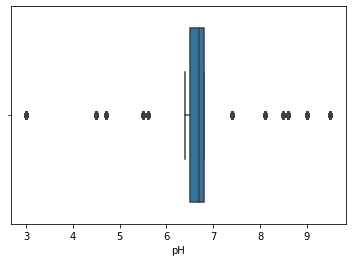

In [ ]:
sns.boxplot(x=milk['pH'])

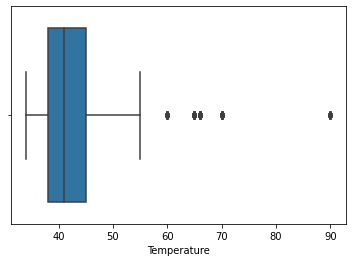

In [ ]:
sns.boxplot(x=milk['Temperature'])

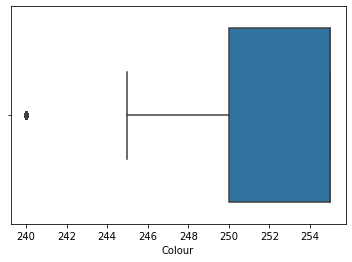

In [ ]:
sns.boxplot(x=milk['Colour'])

Pada diagram di atas terdapat outlier pada kolom pH, Temprature dan Colour sehingga harus diatasi terlebih dahulu

In [ ]:
Q1 = milk.quantile(0.25)
Q3 = milk.quantile(0.75)
IQR = Q3-Q1
milk = milk[~((milk<(Q1-1.5*IQR))|(milk>(Q3+1.5*IQR))).any(axis=1)]

#Cek ukuran setelah dilakukan drop outliers
milk.shape

<ipython-input-14-a93a5ca56d39>:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  milk = milk[~((milk<(Q1-1.5*IQR))|(milk>(Q3+1.5*IQR))).any(axis=1)]


(648, 8)

Sekarang tersisa 648 sampel dalam dataset milknew-nya

In [ ]:
#bagi semua kolom menjadi 2 bagian yaitu numerik dan kategori
numerical_features = ['pH', 'Temperature', 'Colour']
categorical_features = ['Taste', 'Odor', 'Fat', 'Turbidity', 'Grade']

   jumlah sampel  persentase
1            339        52.3
0            309        47.7


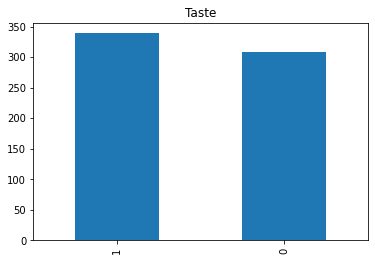

In [ ]:
feature = categorical_features[0]
count = milk[feature].value_counts()
percent = 100*milk[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel': count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature)

Dari diagram di atas disimpulkan bahwa sampel yang memiliki rasa yang enak (bernilai 1) lebih banyak dibandingkan dengan sampel yang memiliki rasa tidak enak (bernilai 0).

   jumlah sampel  persentase
0            401        61.9
1            247        38.1


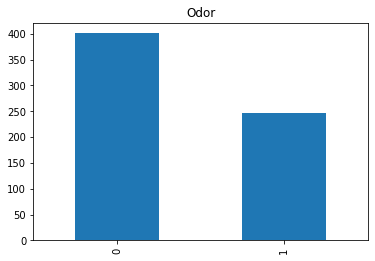

In [ ]:
feature = categorical_features[1]
count = milk[feature].value_counts()
percent = 100*milk[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel': count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature)

Dari diagram di atas disimpulkan bahwa sampel yang memiliki bau yang tidak enak (bernilai 1) lebih banyak dibandingkan dengan sampel yang tidak memiliki bau yang tidak enak (bernilai 0).

   jumlah sampel  persentase
1            423        65.3
0            225        34.7


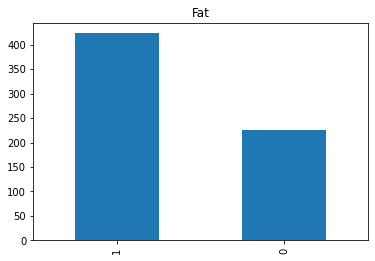

In [ ]:
# karena terdapat whitespace pada judul column fat, hapus terlebih dahulu whitespace-nya
milk.columns = milk.columns.str.strip()

feature = categorical_features[2]
count = milk[feature].value_counts()
percent = 100*milk[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel': count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature)



Dari diagram di atas disimpulkan bahwa sampel yang memiliki lemak tinggi (bernilai 1) lebih banyak dibandingkan dengan sampel yang memiliki lemak rendah (bernilai 0).

   jumlah sampel  persentase
0            436        67.3
1            212        32.7


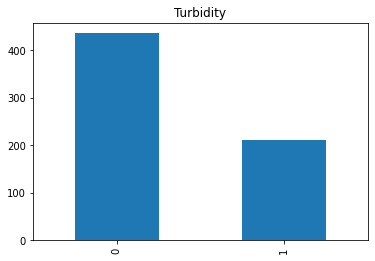

In [ ]:
feature = categorical_features[3]
count = milk[feature].value_counts()
percent = 100*milk[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel': count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature)

Dari diagram di atas disimpulkan bahwa sampel yang memiliki kekentalan rendah (bernilai 0) lebih banyak dibandingkan dengan sampel yang memiliki kekentalan tinggi (bernilai 0).

        jumlah sampel  persentase
medium            342        52.8
high              256        39.5
low                50         7.7


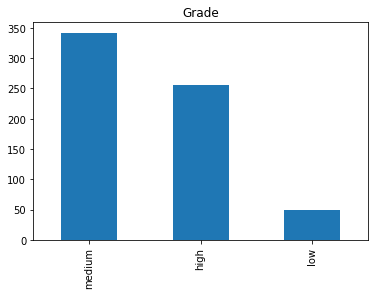

In [ ]:
feature = categorical_features[4]
count = milk[feature].value_counts()
percent = 100*milk[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel': count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature)

Terdapat 3 kategori pada fitur Grade, secara berurutan dari jumlahnya yang paling banyak yaitu: medium, high, dan low. Dari data persentase dapat kita simpulkan bahwa lebih dari 50% sampel merupakan susu tipe grade medium.

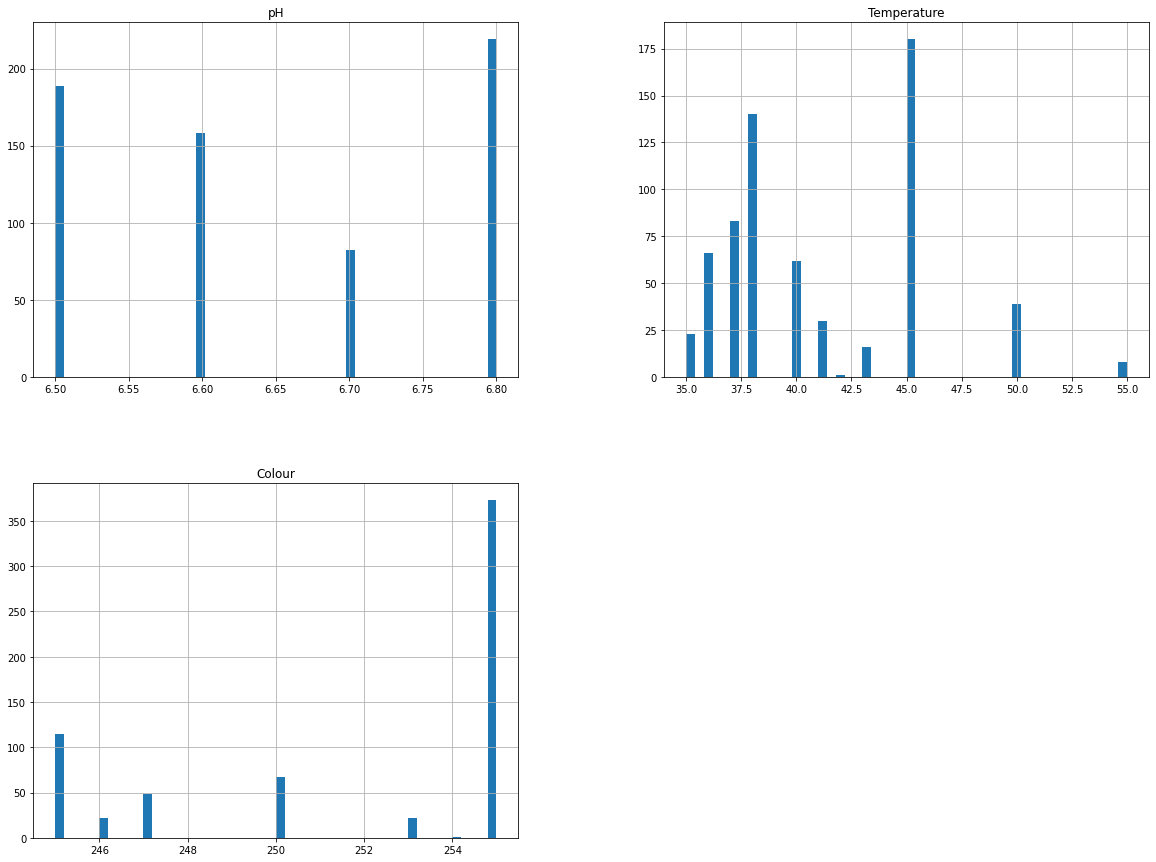

In [ ]:
milk[numerical_features].hist(bins=50, figsize=(20,15))
plt.show()

Dari informasi diatas didapat beberapa kesimpulan yaitu semua diagram tidak terdistribusi merata. 
*   Pada Diagram ph sampel terbagi menjadi 4 bagian dengan kenaikan mendekati 0.1 tiap bagian. 
*   Pada diagram Temperature, distribusi miring ke kiri (left-skewed) dengan nilai tertinggi berada di sekitar nilai 45
*   Pada diagram colour sebagian besar sampel memiliki nilai colour dikisaran 255 



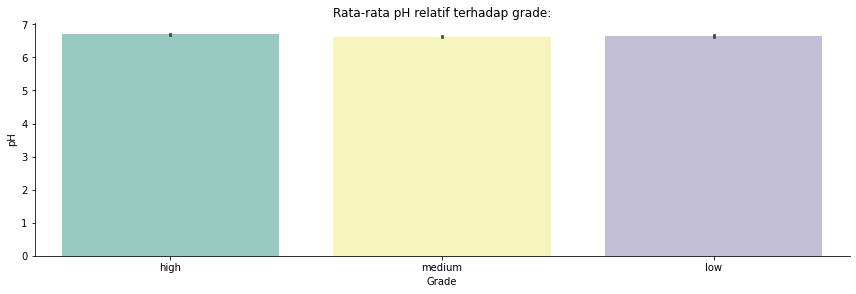

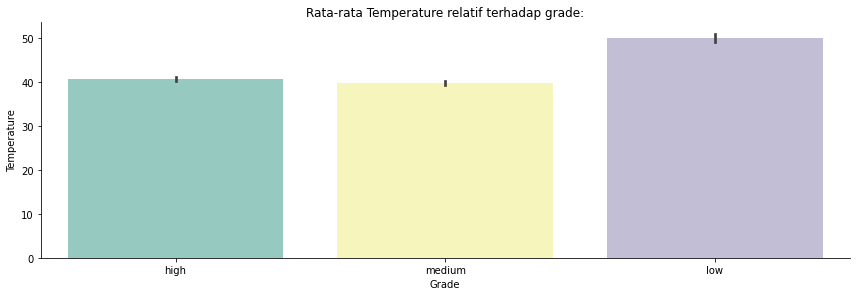

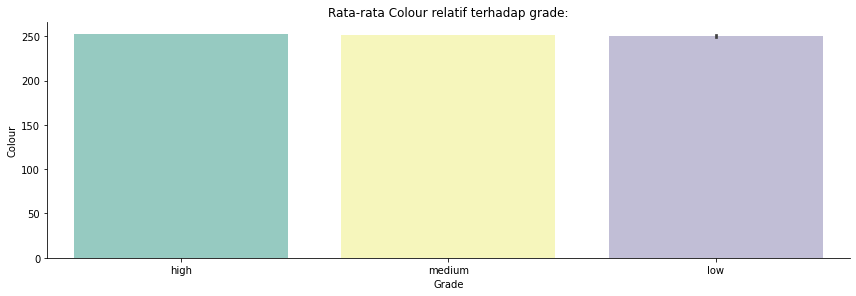

In [ ]:
features = milk[numerical_features]
 
for col in features:
  sns.catplot(x='Grade', y=col, kind="bar", dodge=False, height = 4, aspect = 3,  data=milk, palette="Set3")
  plt.title("Rata-rata {} relatif terhadap grade:".format(col))

Pada diagram di atas, rata-rata colour dan ph cenderung mirip dengan rentang yang hampir sama. Rata-rata temperature pada grade low memiliki rata-rata yang tinggi yaitu sekitar 50 sedangkan pada grade medium dam high memiliki rata-rata temperature yang hampir sama.

In [ ]:
# Bagi sampel dataset menjadi 80% dataset latih dan 20% dataset test

X = milk.drop(["Grade"], axis = 1)
y = milk["Grade"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

print(f'Total sampel pada dataset latih: {len(X_train)}')
print(f'Total sampel pada dataset test: {len(X_test)}')

Total sampel pada dataset latih: 518
Total sampel pada dataset test: 130


In [ ]:
# Lakukan proses scaling dengan StandardScaler pada data numerik
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head

<bound method NDFrame.head of            pH  Temperature    Colour
640 -0.389780     0.921739 -0.420817
950  1.245085    -1.079727  0.304987
634  1.245085     0.921739  0.788856
779 -1.207212    -0.857342  0.788856
32   1.245085     0.254584  0.788856
..        ...          ...       ...
31  -1.207212    -0.190186 -0.420817
102  0.427653     0.921739 -1.146620
460 -1.207212    -0.857342  0.788856
429  0.427653    -0.634957  0.788856
527 -1.207212    -0.634957  0.788856

[518 rows x 3 columns]>

In [ ]:
# Siapkan dataframe untuk analisis model
models = pd.DataFrame(index=['score'], 
                      columns=['KNN', 'RandomForest', 'Boosting'])

In [ ]:
# Lakukan analisis menggunakan K-Nearest Neighbor
knn = KNeighborsClassifier(n_neighbors=5)

# Latih model
knn.fit(X_train, y_train)
models.loc['score', 'KNN'] = cross_val_score(knn, X_train, y_train, scoring="accuracy", cv= 5).mean()


In [ ]:
# Lakukan analisis menggunakan Random Forest
rf = RandomForestClassifier(n_estimators=20, max_depth=16, random_state=43, n_jobs=-1)

# Latih model
rf.fit(X_train, y_train)
models.loc['score','RandomForest'] = cross_val_score(rf, X_train, y_train, scoring="accuracy", cv= 5).mean()

In [ ]:
# Lakukan analisis menggunakan AdaBoost
boosting = AdaBoostClassifier(learning_rate=0.05, random_state=43)

# Latih model                            
boosting.fit(X_train, y_train)
models.loc['score','Boosting'] = cross_val_score(boosting, X_train, y_train, scoring="accuracy", cv= 5).mean()

In [ ]:
models

,KNN,RandomForest,Boosting
score,0.980657,0.994212,0.880246


Dari hasil di atas didapat bahwa random forest memberikan rata-rata hasil akurasi yang sangat besar untuk klasifikasi kualiatas susu. Sehingga model yang akan dipilih adalah random forest

In [ ]:
# Evaluasi akurasi model
result_accuracy = cross_val_score(rf, X_test, y_test, scoring="accuracy", cv= 5).mean()
result_accuracy

0.976923076923077

Dari hasil evaluasi dapat disimpulkan bahwa algoritma random forest sangat cocok digunakan sebagai model dalam proyek ini dengan akurasi sekitar 0.977